# Image Quatization

La Cuantificación, involucrada en el procesamiento de imagen, es una técnica de compresión con pérdida que consiste en comprimir un rango de valores a un único valor. Cuando el número de símbolos discretos en un flujo dado se reduce, el flujo se vuelve más comprensible. Por ejemplo, reducir el número de colores requeridos para representar una imagen digital, hace posible reducir el tamaño de su archivo.

In [15]:
import seaborn as sns
%matplotlib inline
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
sns.set()

In [16]:
# cargar una imagen con matplotlib
# from matplotlib import image con
# 
# mpimg.imread("image.jpg")

In [17]:
# cargar una imagen con scikit
image = datasets.load_sample_image("flower.jpg")
image

# 2/255 color rojo (más fuerte cuánto más cerca de 255)
# 19/255 color verde débil (más fuerte cuánto más cerca de 255)
# 13/255 color azul (más fuerte cuánto más cerca de 255)

# la primera columna: rojo, la segunda: verde y la tercera: azul

array([[[ 2, 19, 13],
        [ 3, 18, 13],
        [ 7, 20, 13],
        ...,
        [ 1, 77, 64],
        [ 0, 76, 64],
        [ 0, 75, 63]],

       [[ 1, 18, 12],
        [ 3, 18, 13],
        [ 7, 20, 13],
        ...,
        [ 0, 76, 64],
        [ 1, 74, 65],
        [ 1, 74, 65]],

       [[ 2, 17, 12],
        [ 6, 19, 12],
        [ 7, 20, 13],
        ...,
        [ 1, 74, 65],
        [ 1, 74, 67],
        [ 1, 74, 67]],

       ...,

       [[ 0, 46, 40],
        [ 1, 48, 40],
        [ 1, 47, 37],
        ...,
        [ 5, 44, 26],
        [ 6, 43, 26],
        [ 7, 44, 27]],

       [[ 0, 47, 41],
        [ 1, 48, 40],
        [ 1, 47, 37],
        ...,
        [ 6, 45, 27],
        [ 7, 44, 27],
        [ 7, 44, 27]],

       [[ 0, 47, 41],
        [ 1, 48, 40],
        [ 0, 46, 36],
        ...,
        [ 7, 46, 28],
        [ 8, 45, 28],
        [ 9, 43, 27]]], dtype=uint8)

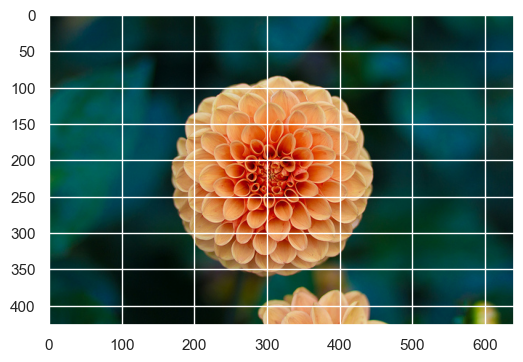

In [18]:
plt.figure(figsize=(6,6), dpi=100)
plt.imshow(image)

In [19]:
type(image)

numpy.ndarray

In [20]:
# Primera dimensión: 427, la altura de la imagen en píxeles
# Segunda dimensión: 640, la anchura de la imagen en píxeles.
# Tercera dimensión: 3, los canales de color de la imagen, Red (R), Green (G), Bleu (B)
image.shape


(427, 640, 3)

In [21]:
image.shape

(427, 640, 3)

In [22]:
image.ndim

3

In [23]:
print(image[0][0][0])
print(image[0][0][1])
print(image[0][0][2])

2
19
13


In [24]:
print(image[150][300][0])
print(image[150][300][1])
print(image[150][300][2])

237
122
41


# Image en 2D

In [25]:
image.shape

(427, 640, 3)

In [26]:
# obtener la imagen en 2d para usar en KMeans
height, width, channel = image.shape
image_2d = image.reshape(height * width, channel) # (multiplicar del ancho al alto)
image_2d.shape

(273280, 3)

# KMeans

In [27]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=9)
labels = kmeans.fit_predict(image_2d)
labels

c:\Users\Malala Severien\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([3, 3, 3, ..., 3, 3, 3])

In [28]:
kmeans.cluster_centers_

array([[  3.9602695 ,  53.97308503,  49.34696161],
       [160.95157086, 114.81218274,  62.6870627 ],
       [210.88004614,  89.59410716,  26.05179826],
       [  6.06406028,  28.72070922,  20.39138298],
       [226.58560899, 180.97354048, 126.84309879],
       [  0.80874805,  78.64791513,  82.45486069],
       [ 59.68452551,  64.29723568,  30.70176689],
       [169.2593524 ,  23.19396416,   4.89154354],
       [218.46786945, 146.8123657 ,  84.74319886]])

# Resultado 3D

In [29]:
rgb_codes = kmeans.cluster_centers_.round(0).astype(int)
rgb_codes

array([[  4,  54,  49],
       [161, 115,  63],
       [211,  90,  26],
       [  6,  29,  20],
       [227, 181, 127],
       [  1,  79,  82],
       [ 60,  64,  31],
       [169,  23,   5],
       [218, 147,  85]])

In [30]:
image_3d = np.reshape(rgb_codes[labels], (height, width, channel))
image_3d

array([[[ 6, 29, 20],
        [ 6, 29, 20],
        [ 6, 29, 20],
        ...,
        [ 1, 79, 82],
        [ 1, 79, 82],
        [ 1, 79, 82]],

       [[ 6, 29, 20],
        [ 6, 29, 20],
        [ 6, 29, 20],
        ...,
        [ 1, 79, 82],
        [ 1, 79, 82],
        [ 1, 79, 82]],

       [[ 6, 29, 20],
        [ 6, 29, 20],
        [ 6, 29, 20],
        ...,
        [ 1, 79, 82],
        [ 1, 79, 82],
        [ 1, 79, 82]],

       ...,

       [[ 4, 54, 49],
        [ 4, 54, 49],
        [ 4, 54, 49],
        ...,
        [ 6, 29, 20],
        [ 6, 29, 20],
        [ 6, 29, 20]],

       [[ 4, 54, 49],
        [ 4, 54, 49],
        [ 4, 54, 49],
        ...,
        [ 6, 29, 20],
        [ 6, 29, 20],
        [ 6, 29, 20]],

       [[ 4, 54, 49],
        [ 4, 54, 49],
        [ 4, 54, 49],
        ...,
        [ 6, 29, 20],
        [ 6, 29, 20],
        [ 6, 29, 20]]])

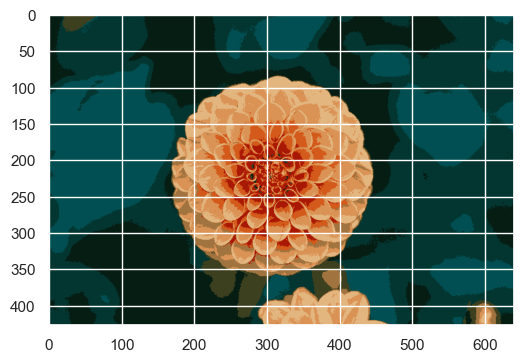

In [31]:
plt.figure(figsize=(6,6), dpi=100)
plt.imshow(image_3d)